In [304]:
# Analysing Premarket watch excel file and building a Strategy

In [305]:
#!pip install numpy 
#!pip install pandas
#!pip install datetime
#!pip install matplotlib.pyplot as plt
#!pip install mplfinance as mpf
#!pip install seaborn as sns
#!pip install talib as ta
#!pip install math

In [306]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import talib

In [307]:
#df1=pd.read_csv('D:\\Python\\Abishek Bhanushali\\Nifty500 list\\ind_nifty500list.csv')
#df1

In [308]:
#df1.count()

In [309]:
#!pip install yfinance

In [310]:
import yfinance as yf

In [311]:
# Downloading 3M India company from Yahoo Finance
df= yf.download("INDNIPPON.NS", period ="7d", interval="15m")

[*********************100%***********************]  1 of 1 completed


In [330]:
#df

In [313]:
#Writing a strategy to code to generate a buy and sell signal as per guidelines
# 1 . Moving average crossover 3, 8 , if 3 is above 8 , buy signal
# 2. If 8 Moving Average above 3, generate a sell signal


In [314]:
# Extraction values of SMA 3 and SMA 8 

In [315]:
# Considering only closing values for predicting trend
Close = df["Close"]

In [316]:
# Checking the datatype of Close
print(type(Close))

<class 'pandas.core.series.Series'>


In [317]:
# Extracting 3 sma using talib library
sma3 = talib.SMA(Close, timeperiod = 3)

In [318]:
# Printing sma8
sma3

Datetime
2021-05-21 09:15:00+05:30           NaN
2021-05-21 09:30:00+05:30           NaN
2021-05-21 09:45:00+05:30    382.383341
2021-05-21 10:00:00+05:30    382.400004
2021-05-21 10:15:00+05:30    381.916667
                                ...    
2021-05-31 13:00:00+05:30    361.183329
2021-05-31 13:15:00+05:30    362.400004
2021-05-31 13:30:00+05:30    363.533335
2021-05-31 13:45:00+05:30    363.516673
2021-05-31 13:59:12+05:30    362.283335
Length: 170, dtype: float64

In [319]:
# Extracting 8 sma using talib library
sma8 = talib.SMA(Close, timeperiod = 8)

In [320]:
# Printing sma8 
sma8

Datetime
2021-05-21 09:15:00+05:30           NaN
2021-05-21 09:30:00+05:30           NaN
2021-05-21 09:45:00+05:30           NaN
2021-05-21 10:00:00+05:30           NaN
2021-05-21 10:15:00+05:30           NaN
                                ...    
2021-05-31 13:00:00+05:30    362.137497
2021-05-31 13:15:00+05:30    362.237499
2021-05-31 13:30:00+05:30    362.325001
2021-05-31 13:45:00+05:30    362.231251
2021-05-31 13:59:12+05:30    362.181252
Length: 170, dtype: float64

In [321]:
# Checking the datatype of sma8
print(type(sma8))

<class 'pandas.core.series.Series'>


In [322]:
# Creating a new column by incorporating the difference between SMA3 and SMA8
df["sma3"] = sma3
df["sma8"] = sma8

In [323]:
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-21 09:15:00+05:30,386.000000,386.000000,380.399994,381.000000,381.000000,1084,NaN,NaN
2021-05-21 09:30:00+05:30,381.000000,383.450012,381.000000,382.450012,382.450012,1680,NaN,NaN
2021-05-21 09:45:00+05:30,382.500000,383.700012,381.000000,383.700012,383.700012,998,382.383341,NaN
2021-05-21 10:00:00+05:30,383.100006,383.100006,381.049988,381.049988,381.049988,778,382.400004,NaN
2021-05-21 10:15:00+05:30,381.000000,382.450012,380.649994,381.000000,381.000000,82,381.916667,NaN
...,...,...,...,...,...,...,...,...
2021-05-31 13:00:00+05:30,361.450012,361.500000,360.350006,361.399994,361.399994,2669,361.183329,362.137497
2021-05-31 13:15:00+05:30,361.399994,366.000000,361.399994,364.700012,364.700012,6996,362.400004,362.237499
2021-05-31 13:30:00+05:30,363.000000,365.350006,362.000000,364.500000,364.500000,4826,363.533335,362.325001


In [324]:
# Filling NAN vales backwards for Dataframe
df =df.fillna( method = "bfill")

In [325]:
# Printing dataframe after filling missing/nan values
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-21 09:15:00+05:30,386.000000,386.000000,380.399994,381.000000,381.000000,1084,382.383341,381.906250
2021-05-21 09:30:00+05:30,381.000000,383.450012,381.000000,382.450012,382.450012,1680,382.383341,381.906250
2021-05-21 09:45:00+05:30,382.500000,383.700012,381.000000,383.700012,383.700012,998,382.383341,381.906250
2021-05-21 10:00:00+05:30,383.100006,383.100006,381.049988,381.049988,381.049988,778,382.400004,381.906250
2021-05-21 10:15:00+05:30,381.000000,382.450012,380.649994,381.000000,381.000000,82,381.916667,381.906250
...,...,...,...,...,...,...,...,...
2021-05-31 13:00:00+05:30,361.450012,361.500000,360.350006,361.399994,361.399994,2669,361.183329,362.137497
2021-05-31 13:15:00+05:30,361.399994,366.000000,361.399994,364.700012,364.700012,6996,362.400004,362.237499
2021-05-31 13:30:00+05:30,363.000000,365.350006,362.000000,364.500000,364.500000,4826,363.533335,362.325001


Text(0.5, 1.0, 'Close Price of SMA3 and SMA8  ')

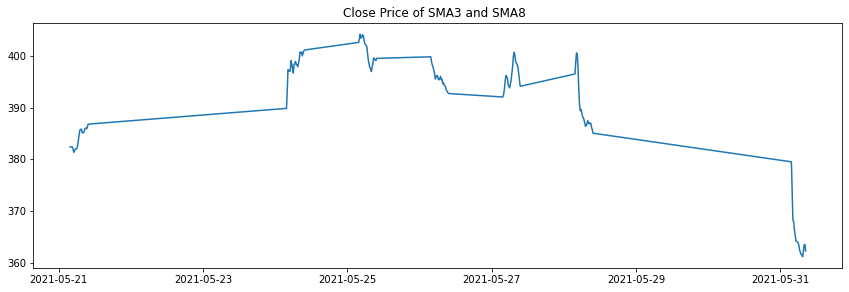

In [326]:
plt.figure(figsize=(14.5,4.5))
plt.plot(df['sma3'], label  ='sma3 & sma8')
plt.title('Close Price of SMA3 and SMA8  ')
#plt.figsave("20 Diff.png")

In [327]:
# Check when 3 sma if greater than or less than 8sma, print a buy signal or else print a sell signal.

In [328]:
# Check Atr value 
df

,Open,High,Low,Close,Adj Close,Volume,sma3,sma8
Datetime,,,,,,,,
2021-05-21 09:15:00+05:30,386.000000,386.000000,380.399994,381.000000,381.000000,1084,382.383341,381.906250
2021-05-21 09:30:00+05:30,381.000000,383.450012,381.000000,382.450012,382.450012,1680,382.383341,381.906250
2021-05-21 09:45:00+05:30,382.500000,383.700012,381.000000,383.700012,383.700012,998,382.383341,381.906250
2021-05-21 10:00:00+05:30,383.100006,383.100006,381.049988,381.049988,381.049988,778,382.400004,381.906250
2021-05-21 10:15:00+05:30,381.000000,382.450012,380.649994,381.000000,381.000000,82,381.916667,381.906250
...,...,...,...,...,...,...,...,...
2021-05-31 13:00:00+05:30,361.450012,361.500000,360.350006,361.399994,361.399994,2669,361.183329,362.137497
2021-05-31 13:15:00+05:30,361.399994,366.000000,361.399994,364.700012,364.700012,6996,362.400004,362.237499
2021-05-31 13:30:00+05:30,363.000000,365.350006,362.000000,364.500000,364.500000,4826,363.533335,362.325001


In [329]:
# Using a for loop to compare 3sma with 8sma and generating a signal.
for i in range(len(df)):
    if df["sma3"][i] > df["sma8"][i] :  # The value should be considered with ATR (7) Inicator.
        print(" Buy Signal")
    else:
        print('Sell signal')

 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
Sell signal
Sell signal
 Buy Signal
Sell signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
Sell signal
Sell signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
Sell signal
Sell signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
Sell signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
 Buy Signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell signal
Sell